# 14-day cumulative number of COVID-19 cases per 100 000

At the end of the page, we provide a detailed description of how the numbers are calculated.

### Compute data

In [1]:
import datetime as dt
import pandas as pd
pd.set_option("max_rows", None)
from oscovida import get_incidence_rates_countries

## Table for all countries

In [2]:
cases_incidence, deaths_incidence = get_incidence_rates_countries()

Downloaded data: last data point 2/7/22 from https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
Downloaded data: last data point 2/7/22 from https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv


In [3]:
cases_incidence

,14-day-sum,population,14-day-incidence-rate
Country,,,
Afghanistan,7028,38928341,18.1
Albania,16805,2877800,584.0
Algeria,19593,43851043,44.7
Andorra,3783,77265,4896.1
Angola,1146,32866268,3.5
Antigua and Barbuda,830,97928,847.6
Argentina,674628,45195777,1492.7
Armenia,39189,2963234,1322.5
Australia,492754,25459700,1935.4


## Table sorted by 14-day-incidence

In [4]:
cases_incidence.sort_values(by=['14-day-incidence-rate'], ascending=False)

,14-day-sum,population,14-day-incidence-rate
Country,,,
Palau,2065,18008,11467.1
Denmark,610459,5837213,10458.1
Israel,822596,8655541,9503.7
Slovenia,187995,2078932,9042.9
Estonia,89101,1326539,6716.8
Georgia,266446,3989175,6679.2
Portugal,678407,10196707,6653.2
France,4018690,65249843,6158.9
Latvia,114257,1886202,6057.5


## Tutorial: Detailed calculation for one country

In [5]:
from oscovida import fetch_cases, get_population
import datetime

In [6]:
period = 14 # Days we compute the incidence rate over

In [7]:
cases = fetch_cases() # Get a DataFrame where each row is the country, and columns cumulative case numbers
cases = cases.groupby(cases.index).sum() # Merge the rows for different regions as we want the numbers for an entire country

In [8]:
cases_germany = cases.loc['Germany'][2:] # First 2 entries are lat/lon so we only take the subsequent ones
cases_germany.tail()

2/3/22    10723644.0
2/4/22    10938030.0
2/5/22    11065146.0
2/6/22    11147509.0
2/7/22    11198886.0
Name: Germany, dtype: float64

In [9]:
yesterday = datetime.datetime.now() - datetime.timedelta(days=1)
x_days_ago = yesterday - datetime.timedelta(days=period)

In [10]:
period_mask = (
    (yesterday > pd.to_datetime(cases_germany.index)) &
    (pd.to_datetime(cases_germany.index) > x_days_ago)
) # Mask for dates between today and x days ago

In [11]:
cases_in_period_per_day_germany = cases_germany[period_mask].diff() # Apply the period mask and get the diff to get the daily new cases
cases_in_period_per_day_germany

1/25/22         NaN
1/26/22    228608.0
1/27/22    160323.0
1/28/22    184054.0
1/29/22    113190.0
1/30/22     71185.0
1/31/22    179431.0
2/1/22     211277.0
2/2/22     238252.0
2/3/22     248652.0
2/4/22     214386.0
2/5/22     127116.0
2/6/22      82363.0
2/7/22      51377.0
Name: Germany, dtype: float64

<AxesSubplot:>

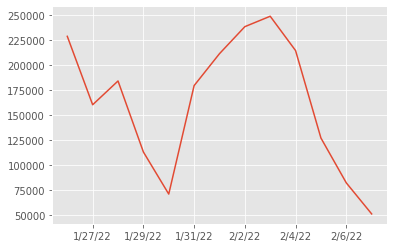

In [12]:
cases_in_period_per_day_germany.plot() # We can easily look at new cases per day

In [13]:
population = get_population().population

In [14]:
population_germany = population.loc['Germany'] # Get the population of Germany
population_germany

83155031.0

In [15]:
incidence_rate_germany = cases_in_period_per_day_germany.sum() / population_germany * 100_000
incidence_rate_germany # By convention this is total cases over period / population * 100_000

2537.6865051015375